<font size='6' color='#FF3206'><b>Project Name :  </b></font>   <font size='6' color='#3792cb'><b> Netflix stock price forecasting

</b></font>

### **Project type** : Time Series Forecasting  

### **Contribution** : Individual  

### **Name** : Vaishnavi Jain


# **Project Summary** :

* Netflix Inc. is a leading American subscription-based streaming service that offers a wide variety of TV shows, movies, anime, documentaries, and more across various genres and languages.
* Purpose : To analyze historical Netflix stock prices and build a predictive model to forecast future stock prices.
* The data underwent preprocessing including cleaning and transformation to ensure stationarity, which is essential for reliable time series modeling.
* A range of ARIMA models were tested and optimized to effectively capture the underlying patterns such as trends and seasonal fluctuations in the stock price.
* The chosen model demonstrated strong predictive performance by closely matching the actual historical prices.
* Finally, the model was used to generate future stock price forecasts, providing valuable insights for investors and financial analysts to make informed decisions.

# **Problem Statement :**

* Netflix’s stock prices fluctuate daily due to various market factors, making it challenging for investors to predict future prices accurately.
* The goal of this project is to analyze historical stock price data and build a reliable forecasting model to predict future stock prices.
* Accurate forecasting will help investors and stakeholders make informed decisions, manage risk, and optimize their investment strategies.

## <font size="6" color="#FF3206">***Let's Begin !***

# <font size="6">**Step-1 : Import Libraries**

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series analysis and statistical tests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Model selection and evaluation
import itertools
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



# <font size="6">**Step-2 : Load Dataset**

#### **Upload CSV File to Colab**

In [3]:
# Upload files from local system
from google.colab import files
uploaded=files.upload()

Saving NFLX.csv to NFLX.csv


#### **Read csv file**

In [4]:
# Load the dataset into a DataFrame
df=pd.read_csv('NFLX.csv')

In [5]:
# Display the first few rows of the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


#### **Understand the given variables :**

* Date: The trading day’s calendar date.
* Open: Stock price at market opening.
* High: Highest price reached during the day.
* Low: Lowest price reached during the day.
* Close: Stock price at market closing.
* Adj Close: Adjusted closing price accounting for dividends and splits — used for accurate analysis.
* Volume: Number of shares traded during the day.

#### **Shape inspection:**

In [6]:
# Print the number of rows and columns in the dataset
df.shape

(1009, 7)

#### **Column inspection:**

In [7]:
# Display all column names in the DataFrame
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Shows data types, non-null counts, and overall info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


 We're only considering  Data & Adj Close column for accurate analysis.So, we will drop all columns except Data & Adj close.

# <font size="6">**Step-3 : Data Cleaning**



In [9]:
# Remove all the extra column from our data
df = df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [10]:
#after removing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Adj Close  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [11]:
# Fix the data type of the date column
df.Date = pd.to_datetime(df.Date)

In [12]:
# After converting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Adj Close  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [13]:
# Make the Date column as our index
df.set_index(['Date'], inplace = True)

we have set Date column as index because the data will be **sorted chronologically** for accurate forecasting.

In [14]:
#Data after setting index as date
df

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


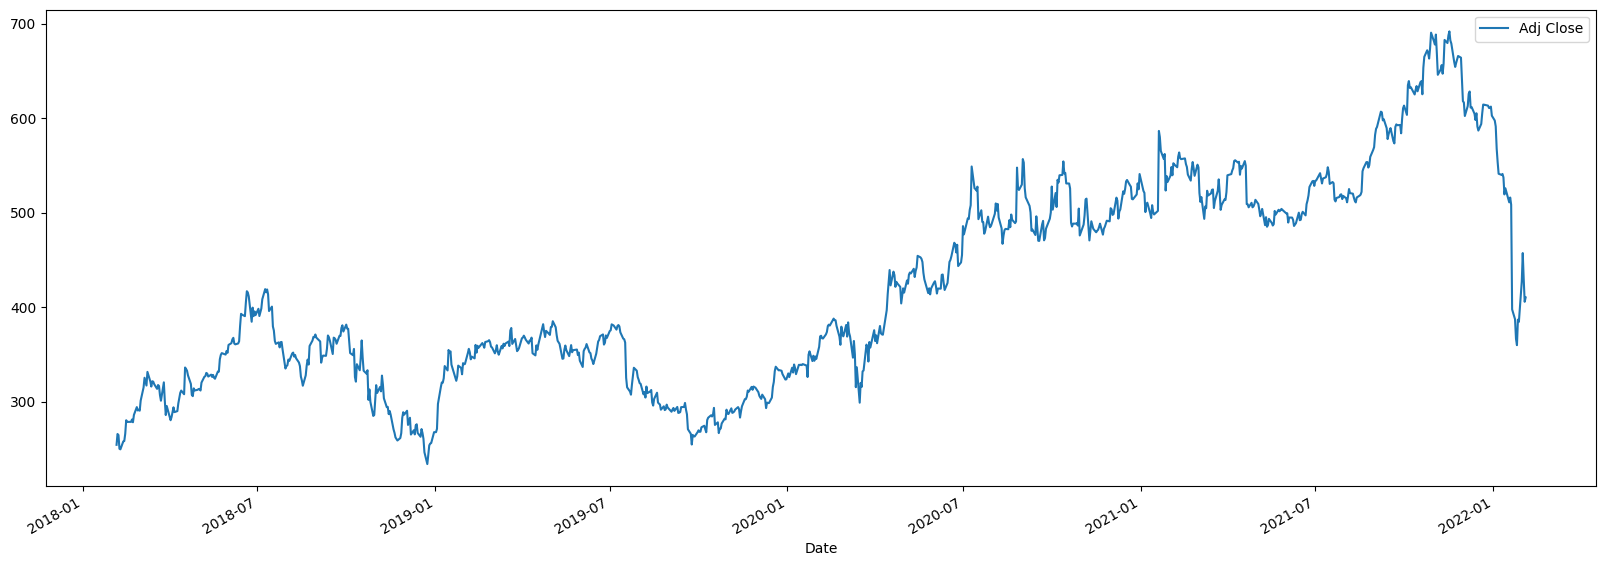

In [15]:
#plot dataframe to check trend & seasonality
df.plot(figsize = (20,7))
plt.show()

From the above plot, the data is having **trend & seasonality**, so we will confirm it by running statistical test to check whether stationary or not

In [16]:
# Perform Augmented Dickey-Fuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

# result[1] gives the p-value; if p < 0.05, the data is stationary
result = adfuller(df)
result[1]

np.float64(0.3742289256820759)

* If the p-value is less than 0.05, we reject the null hypothesis and conclude that the time series is stationary.
* If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, indicating the series is non-stationary.


In [17]:
if result[1] >= 0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


Figure(640x480)


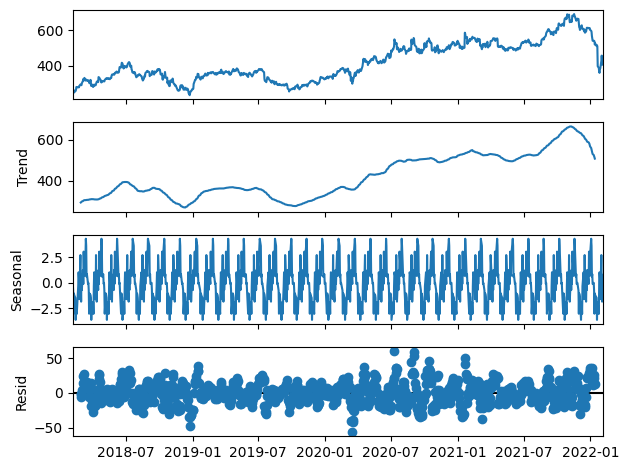

In [18]:
 #Decompose the time series into trend, seasonal, and residual components with a 30-day period
result = seasonal_decompose(df , period = 30)# means one complete cycle is 30 days
print(result.plot())

Before applying the ARIMA model, we need to convert our data from non-stationary to stationary, because ARIMA assumes the input data is stationary — i.e., it has a constant mean and variance over time.
Since our data shows both trend and seasonality, differencing is required to remove these patterns and meet the stationarity condition.

## **Convert Non-stationary to Stationary data**

In [19]:
#Perform first-order differencing
new_data = df - df.shift(1)
new_data.head()

,Adj Close
Date,
2018-02-05,NaN
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005


* Perform first-order differencing to remove trend and make the data stationary
* Subtracts each value from its previous value (current - previous)

In [20]:
new_data

,Adj Close
Date,
2018-02-05,NaN
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005
...,...
2022-01-31,42.780030
2022-02-01,29.989990
2022-02-02,-27.649994


In [21]:
#Remove Nan values from new_data
new_data = new_data.dropna()
new_data

,Adj Close
Date,
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005
2018-02-12,8.480011
...,...
2022-01-31,42.780030
2022-02-01,29.989990
2022-02-02,-27.649994


In [22]:
#Again check whether data became stationary or not with adfuller test
result = adfuller(new_data)
result[1] # result p value present at index 1

np.float64(1.5304022754298515e-26)

In [23]:
if result[1] >= 0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is stationary


After first order differencing, the data is **Stationary**

### **Comparison of Non-Stationary vs. Stationary Time Series**

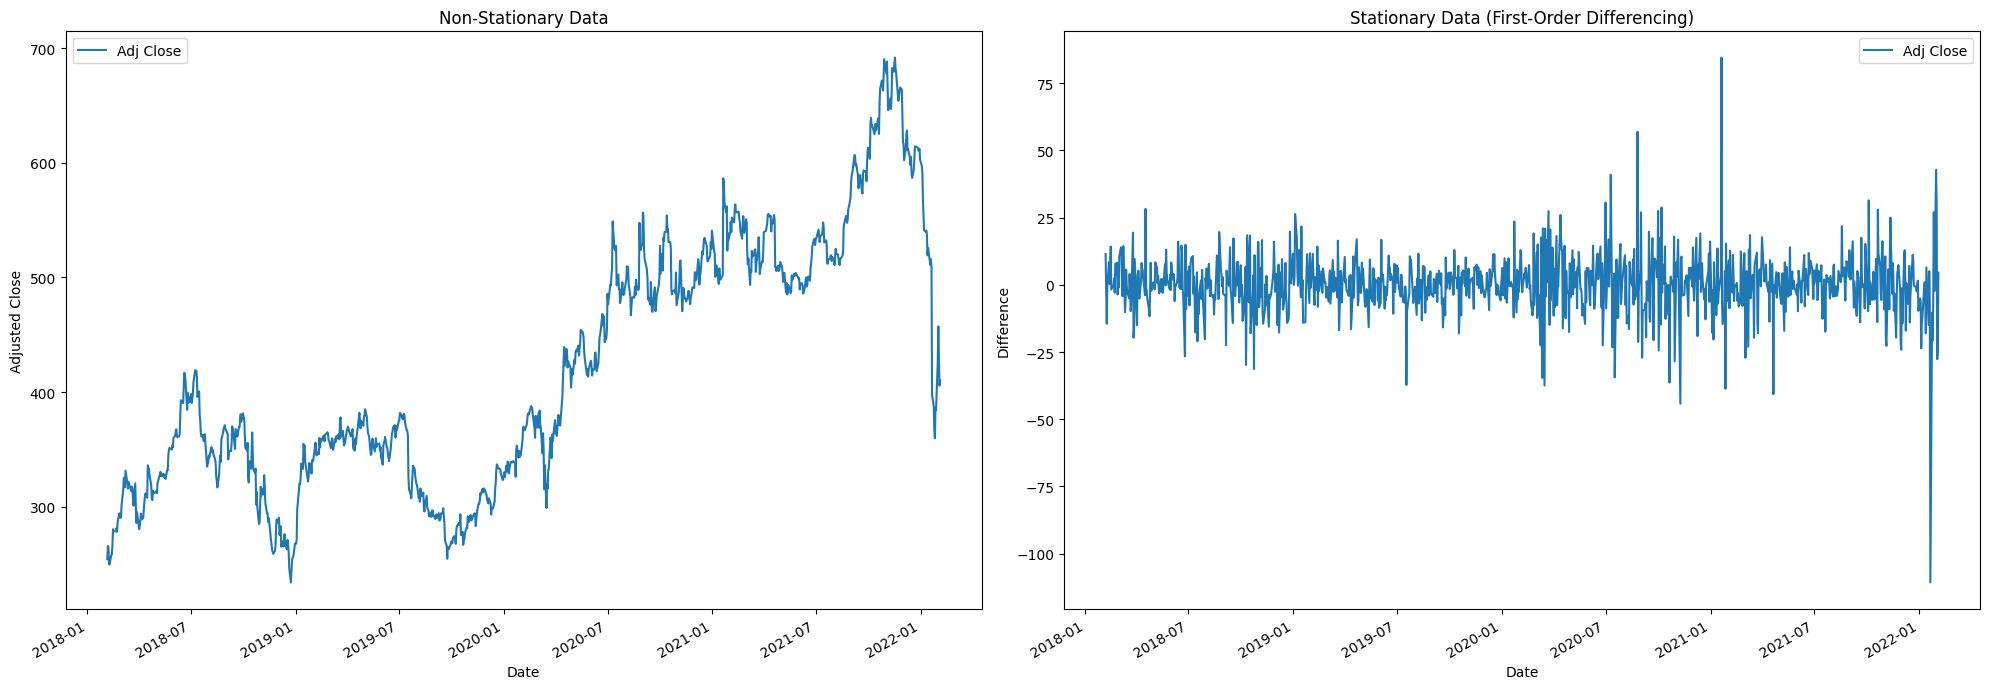

In [25]:
# Create subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot non-stationary data
df.plot(ax=axes[0], title='Non-Stationary Data')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Adjusted Close')


# Plot stationary data
new_data.plot(ax=axes[1], title='Stationary Data (First-Order Differencing)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Difference')


plt.tight_layout()
plt.show()

### Observations:
1. **Non-Stationary Plot (df)**:

* Shows a clear trend (upward or downward movement over time).
* Seasonal patterns or repeating fluctuations may be visible.
* The mean and variance are not constant, which violates the assumptions of many time series models.
* Indicates that the data is not ready for modeling (e.g., ARIMA) without transformation.



---


2. **Stationary Plot (new_data)**:

* The data now fluctuates around a constant mean, with no visible trend.
* Variance appears consistent over time.
* Random short-term fluctuations are present, which is expected in stationary data.
* Suitable for time series modeling, especially ARIMA-type models.



# <font size="6">**Step-4 : Model Building with ARIMA**

ARIMA is a popular time series forecasting model that captures trends and patterns in data by combining autoregression, differencing, and moving averages.

## **Train & Test Split:**

In [26]:
# Calculate training set size as 80% of the total data length
trainsize = int(len(new_data) * 0.8)
trainsize

806

We split the time series into train and test sets.
* training size = 806 rows (from start till 805)
* test size = 202 rows (from index 806 onwards)

In [27]:
# Split the data into training and testing sets based on the calculated training size
train = df['Adj Close'][ : trainsize] #80% data
test = df['Adj Close'][trainsize : ] #20% data

In [28]:
train

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2021-04-13,553.729980
2021-04-14,540.020020
2021-04-15,549.219971


In [29]:
test

,Adj Close
Date,
2021-04-20,549.570007
2021-04-21,508.899994
2021-04-22,508.779999
2021-04-23,505.549988
2021-04-26,510.299988
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


## **Hyperparameter Tuning: Selecting the Best ARIMA (p, d, q) Parameters**

In [30]:
p = range(0,10) # past values
d = range(1,2) # differencing
q = range(0,10) # past errors

In [31]:
# create a combination of different value of p, d ,q that you can try in your model

pdq = list(itertools.product(p,d,q))

rmse = [] # to store the rmse score of different value of pdq whichever pdq gives best score considered as final value

order1 = []

for i in pdq:
  model = ARIMA(train , order = i)
  model_fit = model.fit()
  pred = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
  error = np.sqrt(mean_squared_error(test,pred)) # compare actual value vs predicted value

  # add the score in the list so later on we can compare all score of all pdq values
  order1.append(i)
  rmse.append(error)

# store the result in a dataframe to compare them
result = pd.DataFrame(index = order1, data = rmse , columns = ['RMSE Score'])
result

,RMSE Score
"(0, 1, 0)",70.279051
"(0, 1, 1)",70.325830
"(0, 1, 2)",70.318572
"(0, 1, 3)",70.330479
"(0, 1, 4)",70.321461
...,...
"(9, 1, 5)",79.624392
"(9, 1, 6)",70.465317
"(9, 1, 7)",70.334729
"(9, 1, 8)",70.292854


## **Model Evaluation Metrics:**

In [32]:
# Sort the results to identify the parameter set with the lowest RMSE (best model)
result.sort_values(by = 'RMSE Score')

,RMSE Score
"(8, 1, 4)",70.232401
"(6, 1, 7)",70.233022
"(6, 1, 6)",70.246751
"(7, 1, 6)",70.253537
"(7, 1, 8)",70.253918
...,...
"(5, 1, 6)",71.363200
"(5, 1, 9)",71.560976
"(5, 1, 7)",72.086297
"(7, 1, 5)",72.156601


# **Prediction & Visualisation**

In [33]:
# Define the prediction start and end points for the test set indices
start = len(train)
end = len(train) + len(test) - 1

In [34]:
print(start,end)

806 1008


we are making prediction from 805th index till 1007th index

In [35]:
# create the model # order = (p,d,q)

model1 = ARIMA(df['Adj Close'], order = (8,1,4))
result1 = model1.fit()


##### **ARIMA Model Parameters (p, d, q)**:
* p = AutoRegressive part (How many past value you want to use to predict the current value)
* d = Differencing (how many time you did differencing to make your data as stationary)
* q = Moving average part (How many past errors you want to use to predict the current value)

In [36]:
# let's directly add a new column to our data to show the predicted values
df['Prediction_by_ARIMA'] =  result1.predict(start = 1, end = 1008)

In [37]:
df

,Adj Close,Prediction_by_ARIMA
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,254.258298
2018-02-07,264.559998,265.092774
2018-02-08,250.100006,264.871023
2018-02-09,249.470001,250.888338
...,...,...
2022-01-31,427.140015,390.187406
2022-02-01,457.130005,427.746750
2022-02-02,429.480011,458.096630


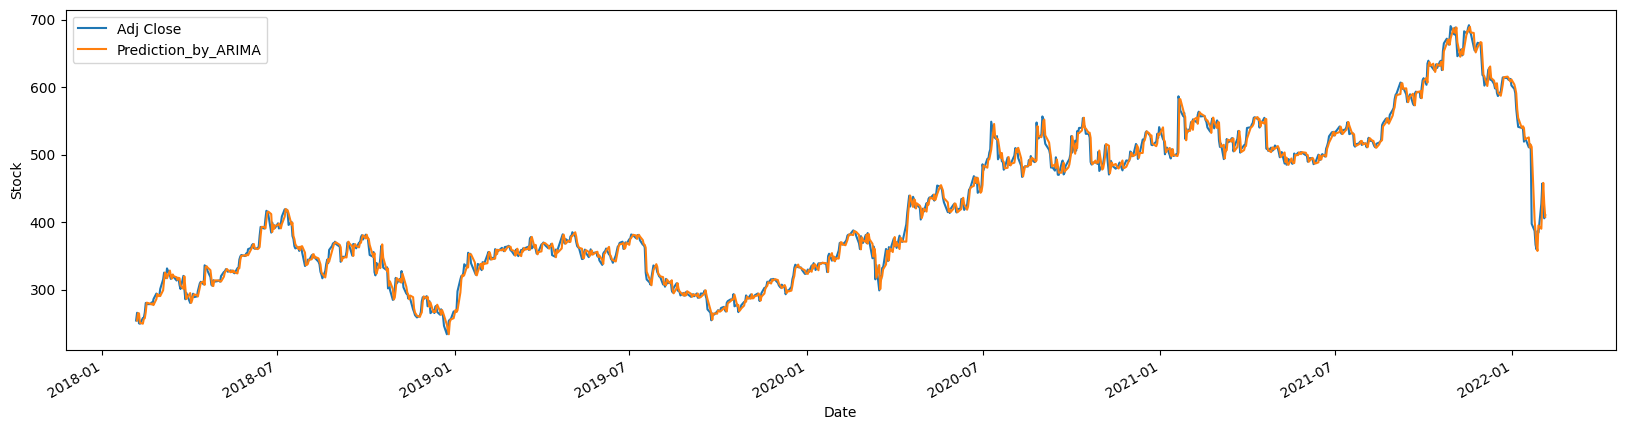

In [38]:
# let's plot a graph to show the actual value and the predicted value

df[['Adj Close','Prediction_by_ARIMA']].plot(figsize = (20,5))
plt.xlabel('Date')
plt.ylabel('Stock')
plt.show()

#### **Observations:**
* The ARIMA model's predicted values closely follow the actual stock price trend, especially in the short term.
* Overall, the model shows good predictive accuracy, making it suitable for short-term forecasting of Netflix stock prices.

# **Future Forecasting**

In [39]:
# use the model for future prediction
forecast = result1.get_forecast(steps = 30)

In [40]:
# Extract the forecast value for upcoming 30 days after the 4th feb 2022

forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1009,407.226598
1010,401.913089
1011,401.185967
1012,404.297010
1013,407.517620
1014,407.830682
1015,405.159611
1016,404.766041
1017,407.714760
1018,408.168948


In [42]:
# Forecast Netflix stock prices for the next 365 days and extract predicted values

forecast = result1.get_forecast(steps = 365)
forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1009,407.226598
1010,401.913089
1011,401.185967
1012,404.297010
1013,407.517620
...,...
1369,406.230525
1370,406.230695
1371,406.230610
1372,406.230436


# **Business Conclusion**

* The ARIMA model effectively captures Netflix stock price trends and seasonality for accurate short-term forecasting.

* Provides investors with actionable insights to make timely buy, hold, or sell decisions.

* Helps portfolio managers optimize investment strategies and manage risks better.

* Enables better financial planning by anticipating price movements and market fluctuations.

* Supports data-driven decision-making, improving confidence in volatile market conditions.

* Enhances competitive advantage by leveraging predictive analytics for stock trading.